**Part 1: Descriptive Analytic Techniques**

In [22]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [25]:
#Import The Data
DataSalesByYear = pd.read_csv('data/SalesPerYear.csv')
DataSalesByProduct = pd.read_csv('data/SalesByProduct.csv')
DataEmployeesExpenses = pd.read_csv('data/EmployeesExpenses.csv')
DataSellsByCountry = pd.read_csv('data/SellsByCountry.csv')

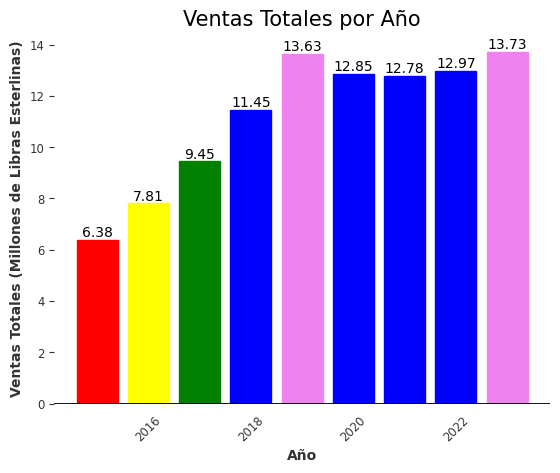

In [15]:
# Bar Chart: Total Sales in the last 5 years

# Crear una figura y un conjunto de subtramas
fig, ax = plt.subplots()

# Crear el gráfico de barras
bars = ax.bar(DataSalesByYear['Year'], DataSalesByYear['Total_Sales(MillionsPounds)'])

# Colorear cada barra individualmente
for bar, sales in zip(bars, DataSalesByYear['Total_Sales(MillionsPounds)']):
    if sales < 7:
        bar.set_color('red')
    elif sales < 9:
        bar.set_color('yellow')
    elif sales < 11:
        bar.set_color('green')
    elif sales < 13:
        bar.set_color('blue')
    else:
        bar.set_color('violet')

    # Agregar la cantidad total de ventas encima de cada barra
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(sales), 
            ha='center', va='bottom', color='black', fontsize=10)

# Agregar títulos y etiquetas
ax.set_title('Ventas Totales por Año', fontsize=15)
ax.set_xlabel('Año', fontsize=10)
ax.set_ylabel('Ventas Totales (Millones de Libras Esterlinas)', fontsize=10)

# Dibujar una línea horizontal en el eje y=0
ax.axhline(0, color='black')

# Eliminar las líneas internas
ax.grid(False)

# Mejorar la estética de las marcas en el eje x
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

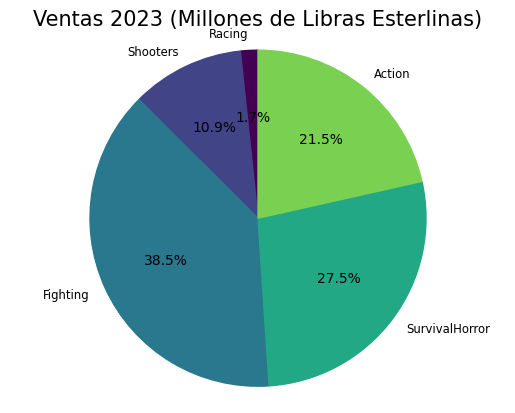

In [19]:
#Pie Chart: Sells by type of product

# Crear una figura y un conjunto de subtramas
fig, ax = plt.subplots()

# Crear el gráfico de pastel
wedges, texts, autotexts = ax.pie(DataSalesByProduct['Sells2023(MillionPounds)'], labels = DataSalesByProduct['Product'], autopct='%1.1f%%', startangle=90)

# Asegurarse de que el gráfico de pastel sea un círculo perfecto
ax.axis('equal')

# Colorear cada porción individualmente
for i in range(len(wedges)):
    wedges[i].set_color(plt.cm.viridis(i / len(wedges)))

# Agregar un título
ax.set_title('Ventas 2023 (Millones de Libras Esterlinas)', fontsize=15)

# Mostrar el gráfico
plt.show()

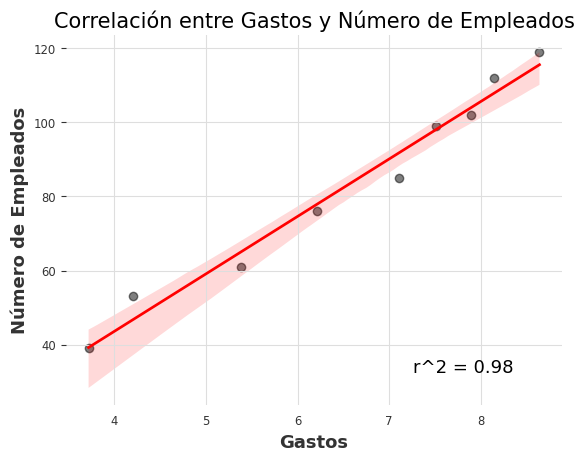

In [24]:
#Correlation between the expenses and number of employees

# Calcular el coeficiente de correlación r cuadrado
correlation, _ = pearsonr(DataEmployeesExpenses['Expenses'], DataEmployeesExpenses['NumberEmployees'])
r_squared = correlation**2

# Crear una figura y un conjunto de subtramas
fig, ax = plt.subplots()

# Crear el gráfico de burbujas
scatter = ax.scatter(DataEmployeesExpenses['Expenses'], DataEmployeesExpenses['NumberEmployees'], alpha=0.5)

# Crear la línea de correlación
sns.regplot(x='Expenses', y='NumberEmployees', data=DataEmployeesExpenses, scatter=False, ax=ax, color='red')

# Agregar el coeficiente de correlación r cuadrado a la gráfica
ax.text(0.8, 0.1, 'r^2 = {:.2f}'.format(r_squared), fontsize=13, ha='center', va='center', transform=ax.transAxes)

# Agregar títulos y etiquetas
ax.set_title('Correlación entre Gastos y Número de Empleados', fontsize=15)
ax.set_xlabel('Gastos', fontsize=13)
ax.set_ylabel('Número de Empleados', fontsize=13)

# Mostrar el gráfico
plt.show()

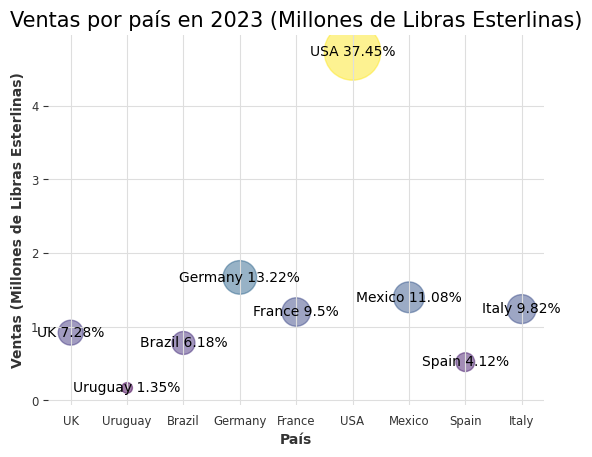

In [36]:
#Sells by country

# Calcular el porcentaje de ventas
DataSellsByCountry['Percentage'] = (DataSellsByCountry['Sells(2023-MillionPounds)'] / DataSellsByCountry['Sells(2023-MillionPounds)'].sum()) * 100

# Crear una figura y un conjunto de subtramas
fig, ax = plt.subplots()

# Crear el gráfico de burbujas
scatter = ax.scatter(DataSellsByCountry['Country'], DataSellsByCountry['Sells(2023-MillionPounds)'], alpha=0.5, 
                     s=DataSellsByCountry['Sells(2023-MillionPounds)']*350, # Aumentar el tamaño de las burbujas
                     c=DataSellsByCountry['Sells(2023-MillionPounds)'], cmap='viridis')

# Agregar el porcentaje de ventas y el nombre del país a cada burbuja
for i in range(len(DataSellsByCountry)):
    ax.text(DataSellsByCountry['Country'][i], DataSellsByCountry['Sells(2023-MillionPounds)'][i], 
            DataSellsByCountry['Country'][i] + ' ' + str(round(DataSellsByCountry['Percentage'][i], 2)) + '%', 
            ha='center', va='center', fontsize=10)

# Agregar títulos y etiquetas
ax.set_title('Ventas por país en 2023 (Millones de Libras Esterlinas)', fontsize=15)
ax.set_xlabel('País', fontsize=10)
ax.set_ylabel('Ventas (Millones de Libras Esterlinas)', fontsize=10)

# Mostrar el gráfico
plt.show()


**Part 2: Predictive Analytic Techniques**

In [48]:
# Import libraries
from darts import TimeSeries
from darts.models import AutoARIMA

In [49]:
#Import the data
DataForecast = pd.read_csv('data/ForecastData.csv')

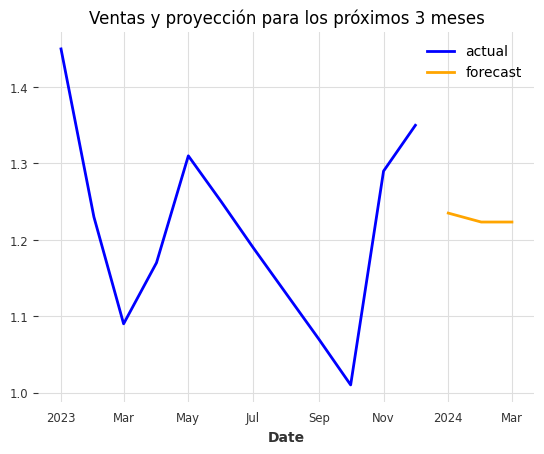

In [52]:
#Time Series Forecasting: Sales in the next 4 months

# Convertir los datos en una serie temporal
series = TimeSeries.from_dataframe(DataForecast, 'Date', 'Sales(MillionPounds)')

# Crear y entrenar el modelo de predicción
model = AutoARIMA()
model.fit(series)

# Proyectar las ventas de los próximos 3 meses
forecast = model.predict(3)

# Dibujar la serie temporal y la proyección
series.plot(label='actual', color='blue')
forecast.plot(label='forecast', color='orange')
plt.title('Ventas y proyección para los próximos 3 meses')
plt.legend()
plt.show()

**Part3: Prescriptive Analytic Techniques**

In [ ]:
#Import libraries
import pulp as plp

In [ ]:
#Import the data

In [ ]:
#Linear Programming: Optimal production plan
